LIMPIEZA DE DATOS CON PYTHON Y PANDAS
--------------------------------------

1. El problema a resolver

Podríamos resolver por ejemplo:

    - Predicción de tendencias: utilizar análisis predcitivo para prever las futuras tendencias del índice y tomar decisiones informadas sobre la compra o venta de activos
    - Gestión de riesgos: desarrollar modelos de riesgo que ayuden a identificar y mitigar posibles riesgos en las inversiones basándose en la volatilidad histórica, correlaciones con otros activos, etc
    - Optimización de la cartera: utilizar los datos para construir una cartera diversificada que maximice el rendimiento y minimice el riesgo, teniendo en cuenta las correlaciones históricas entre diferentes activos
    - Timing del mercado: analizar los datos para identificar patrones temporales que puedan ayudar en la toma de decisiones sobre cuándo entrar o salir del mercado

In [1]:
# Importamos las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mostramos la ruta de donde tomamos los datos
ruta = "data/stock/indexData.csv"
data = pd.read_csv(ruta)

In [3]:
# Mostramos la forma del DataFrame. En este caso es una tupla que representa el número de filas y columnas
print(data.shape)

# Mostramos las primeras filas del DataFrame
data.head()


(112457, 8)


,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [4]:
# Mostramos las variables categóricas y las numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110253 non-null  float64
 4   Low        110253 non-null  float64
 5   Close      110253 non-null  float64
 6   Adj Close  110253 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB


2. Limpieza

Realizamos el proceso de limpieza teniendo en cuenta:

    - Falta de datos en algunas celdas
    - Columnas irrelevantes (no responden al problema a resolver)
    - Registros (filas) repetidos
    - Valores extremos (outliers) en el caso de variables numéricas
    - Errores tipográficos en el caso de variables categóricas

2.1 Falta de datos en algunas celdas

In [6]:
# Eliminamos las filas dondes e encuentren celdas con datos vacíos
data_sin_nulos = data.dropna()

data_sin_nulos.info()

# Guardamos el nuevo DataFrame en un archivo CSV
data_sin_nulos.to_csv('data/stock/data_sin_nulos.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 110253 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      110253 non-null  object 
 1   Date       110253 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110253 non-null  float64
 4   Low        110253 non-null  float64
 5   Close      110253 non-null  float64
 6   Adj Close  110253 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 7.6+ MB


2.2 Columnas irrelevantes

    - Columna que no contiene información relevante para el problema que queremos resolver
    - Columna categórica pero con un sólo nivel
    - Columna numérica pero con un sólo valro
    - Columnas con información redundante

In [9]:
# Conteo de los niveles en las diferentes columnas categóricas
columns_cat = ['Index', 'Date']

for column in columns_cat:
    print(f'Columna {column}: {data_sin_nulos[column].nunique()} subniveles')

Columna Index: 14 subniveles
Columna Date: 14657 subniveles


Las columnas categóricas tienen más de 1 subnivel, por lo que no eliminaremos ninguna

Verificamos lo que ocurre con las columnas numéricas:

In [10]:
data_sin_nulos.describe()

# Si la desviación estándar (std) es exáctamente igual a 0, significa que en esa columna, todos los valores son exáctamente iguales

,Open,High,Low,Close,Adj Close,Volume
count,110253.000000,110253.000000,110253.000000,110253.000000,110253.000000,1.102530e+05
mean,7658.515222,7704.372961,7608.000422,7657.545872,7657.351729,1.273975e+09
std,9011.478913,9066.638548,8954.506981,9011.510444,9011.608900,4.315783e+09
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00
25%,1855.030029,1864.510010,1843.979980,1855.060059,1854.179565,0.000000e+00
50%,5194.089844,5226.279785,5154.049805,5194.750000,5194.750000,4.329000e+05
75%,10134.299810,10207.820310,10060.349610,10134.830080,10134.830080,1.734314e+08
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10


2.3 Filas repetidas

In [40]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data_sin_nulos}')

data_sin_nulos_ni_repetidos = data_sin_nulos.drop_duplicates()
data_sin_nulos_ni_repetidos.to_csv('data/stock/data_sin_nulos_ni_repetidos.csv', index=False)

print(f'Tamaño del set después de eliminar las filas repetidas: {data_sin_nulos_ni_repetidos.shape}')

Tamaño del set antes de eliminar las filas repetidas:        Index        Date         Open         High          Low        Close  \
0        NYA  1965-12-31   528.690002   528.690002   528.690002   528.690002   
1        NYA  1966-01-03   527.210022   527.210022   527.210022   527.210022   
2        NYA  1966-01-04   527.840027   527.840027   527.840027   527.840027   
3        NYA  1966-01-05   531.119995   531.119995   531.119995   531.119995   
4        NYA  1966-01-06   532.070007   532.070007   532.070007   532.070007   
...      ...         ...          ...          ...          ...          ...   
112452  N100  2021-05-27  1241.119995  1251.910034  1241.119995  1247.069946   
112453  N100  2021-05-28  1249.469971  1259.209961  1249.030029  1256.599976   
112454  N100  2021-05-31  1256.079956  1258.880005  1248.140015  1248.930054   
112455  N100  2021-06-01  1254.609985  1265.660034  1254.609985  1258.579956   
112456  N100  2021-06-02  1258.489990  1263.709961  1258.239990  1

2.4 Outliers en las variables numéricas

No siempre se deben eliminar los outliers porque dependiendo de la variable numérica analizada, estos pueden contener información importante

Creamos gráficos tipo 'boxplot' de las columnas numéricas:

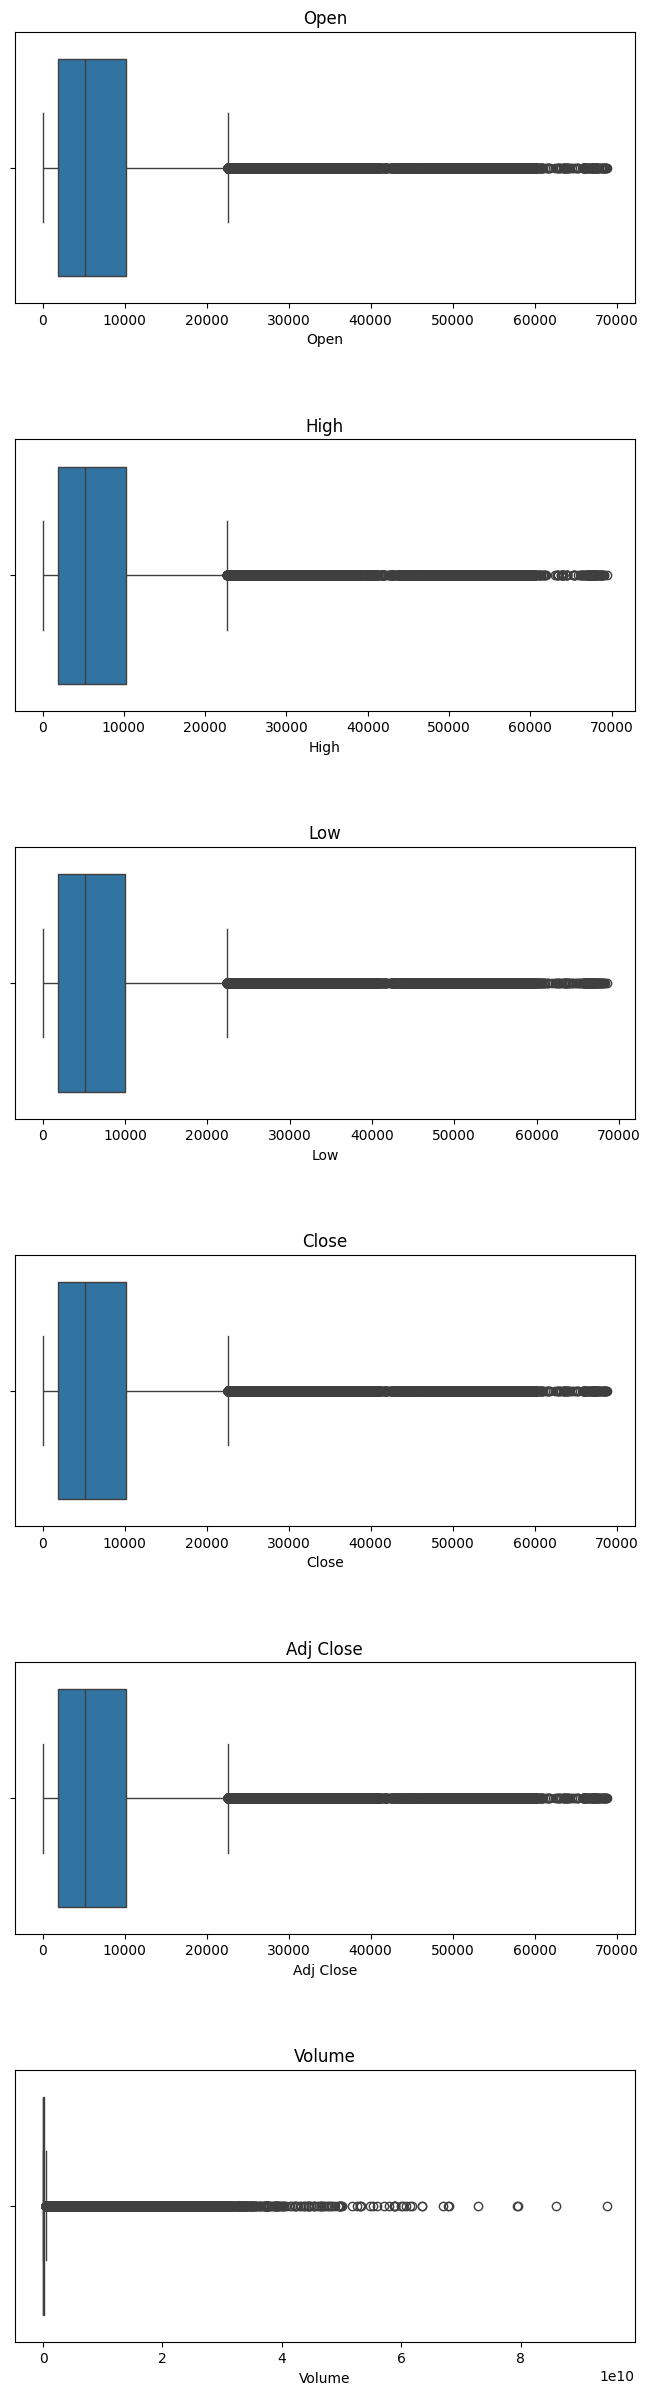

In [22]:
# Generar gráficas individuales, ya que las variables numéricas están en rangos diferentes
columns_num = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

fig, ax = plt.subplots(nrows=len(columns_num), ncols=1, figsize=(8, 5 * len(columns_num)))
fig.subplots_adjust(hspace=.5)

for i, column in enumerate(columns_num):
    sns.boxplot(x=data_sin_nulos_ni_repetidos[column], ax=ax[i])
    ax[i].set_title(column)

Observaciones:

    - Vemos que hay valores de volumen en 0, por lo que procedemos a borrar esos registros

In [41]:
# Eliminar filas con 'volume'==0
print(f'Tamaño del set antes de eliminar registros de volumen: {data_sin_nulos_ni_repetidos.shape}')

data_sin_nulos_ni_repetidos = data_sin_nulos_ni_repetidos[data_sin_nulos_ni_repetidos['Volume'] != 0.0]

print(f'Tamaño del set después de eliminar registros de volumen: {data_sin_nulos_ni_repetidos.shape}')

Tamaño del set antes de eliminar registros de volumen: (110253, 8)
Tamaño del set después de eliminar registros de volumen: (68160, 8)


2.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer subniveles como 'unknown' y 'UNK' que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes

Debemos unificar estos subniveles

In [ ]:
# Graficamos los subniveles de cada variable categórica
columns_cat = ['Index', 'Date']

fig, ax = plt.subplots(nrows=len(columns_cat), ncols=1, figsize=(10, 30))
fig.subplots_adjust(hspace=1)

for i, column in enumerate(columns_cat):
    sns.countplot(x=column, data=data_sin_nulos_ni_repetidos, ax=ax[i])
    ax[i].set_title(column)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

In [45]:
data_sin_nulos_ni_repetidos.shape

(68160, 8)

Ya hemos realizado la limpieza de nuestro set de datos

Generalmente esta limpieza de datos implica el manejo de datos faltantes o repetidos, así como el manejo de valores extremos

El DataFrame resultante tiene 68.160 filas y 8 columnas

El DataSet ya está listo para el Análisis Exploratorio

In [46]:
ruta = "data/stock/data_procesado.csv"
data.to_csv(ruta)